I denna analys av housing information som vi fått till oss i vårt team kommer vi som i ett första steg att genomföra en sk. EDA (Exploratory Data Analysis) som kan ge svar på några av de frågor som vi har samt ge oss en del insikter för vidare analys och inhämtning av ytterligare information om så blir nödvändigt. 


Några frågor/insikter som vi först skulle vilja få svar på i vår analys:
1. Undersöka kvaliten på den data vi har fått till oss
1:1. Vilka datatyper har vi att analysera med?
Svar: All data är flyttal medans sista kolumnen innehåller text/kategorier (exempelvis Near Bay, Near Ocean mfl.). Detta gör att vi kan utföra beräkningar på kolumner som värde, population, inkomst och antal hushåll och då i förhållande till plats. Förväntat här är att 
priserna på husen är högre Near Bay och Near Ocean samt att höginkomstagare är de som också
bor i dessa hushåll. Vi gör först en grov analys för att sedan borr oss vidare in i datat
för att få svar på specifika frågor här nedan.

1:2. Saknas det några värden i housing-data, dvs null-väden
Svar: Ja, kolumnen total_bedrooms innehåller null-värden. 207 rader saknar
värde i denna kolumn. Nedan har jag försökt visualisera detta till geografiska områden.
Vi kan se 2 kluster som tydligt saknar denna information. En slutsats kan vara att just
dessa områden kan vara industrilokaler, affärer osv som saknar sovrum.

Med det sagt, beroende på vilka frågor som man vill få svar på så skulle man kunna komplettera housing-data med saker som närheten till centrum, avstånd till närmaste skola, sjukhus, boyta, tomtstorlek etc. I sådana fall skulle mn kunna dra slutsater kring huspriserna beroende på dessa parametrar. Just nu har vi nästan uteslutande att gå på hur nära husen ligger till havet eller marinan. 



1:3. Finns det någon data som sticker ut?
Svar: Här behöver vi titta på varje kolumn, sortera och granska för att få reda på om 
några värden egentligen inte är representativt för övriga mängden data. Men, om vi tittar
på statistiken från punkt 1:2 ovan där vi t ex kan se medelvärden för inkomst (3.87), huspriser (206855.82), antal sovrum(537) och antal hushåll (499). Utan att veta någon
valuta (troligen dollar eftersom detta ligger i USA) så ligger medianhushållen på runt 2 miljoner dollar. Inkomsten är jag osäker på eftersom
3.87... innebär tusen dollar, troligen är det så. Alltså 3800 dollar i medleinkomst låter ändå relativt rimligt. Hushåll på 499 med antalet sovrum på 537 säger mig att vi har med 
områden att göra och inte specifika hus. Men, om vi räknar ut antalet sovrum per hushåll så får vi lite dryg 1 sovrum per hus i snitt. Vidare analys längre ner så kanske vi kan ta reda på om vissa hushåll har fler sovrum boroende på område, huspris och inkomster.


2. Undersöka om vi kan se några samband i data?
2:1. Kan vi se något samband mellan inkomst och huspriser?
Svar: Vi kan tydligt se att inkomsten är en faktor när det gäller huspriser.
När vi studerar den visuella grafen ser vi också en trendlinje (röd) som indikerar en trend där huspriser korrelerar med inkomsten. Vi kan även se att yngre hus ägs av personer med högre inkomster. Däremot ägs äldre hus av personer med lägre inkomst, men dessa hus är också dyrare. Slutsatsen här kan vara att människor har betalat av sina lån och att dessa hus har ökat i värde, vilket gör att de har råd att bo kvar i dem.
En annan dimension är befolkningen. Även om det finns vissa data som sticker ut är det svårt att se några tydliga mönster. En sak jag lade märke till var några större populationer längs trendlinjen – ju mer du tjänar, desto högre är husets värde.

2:2: Hur påverkar åldern på husen priserna?
Svra: Vi kan tydligt se att huspriserna är lägre när huset ligger mer inåt landet(gröna prickar) jämfört med huspriser nära havet eller vid bukten(blå eller röd). Vi ser vissa indikationer på äldre hus nära bukten/marinan som hör till de dyraste husen. Om vi även studerar trendlinjen kan vi se att priserna stiger med åldern – inte mycket, men de ökar. Om jag skulle spekulera, tyder datan mest på en värdeökning driven av inflation.

2:3. Hur påverkas huspriserna av närheten till havet?
Svar: Genom undersökning i punkt 2:2 så kunde vi se närhet till vatten ökar på huspriserna.
Vid vidare undersökning och med hjälp av en boxplot kunde vi bekräfta det vi redan vet att
ju närmare vatten du kommer desto dyrar priser. Det som var lite förvånande var att hus på öar
verkar vara dyrast. Dock har vi väldigt lite data för just hus på öar så denna data är inte helt
representativ för huspriser på öar.

2:4. Hur stora är husen, dvs kan vi se generellt hur många rum ett hus har?
Svar: När vi tittar på antal rum per hushåll varierar det mellan 2 till 10 rum, men de flesta hushåll har ungefär 5 rum. När det gäller sovrum kan vi se att de flesta hushåll har 1 sovrum.
Går vi vidare till antalet personer per hushåll ser vi, genom att studera scatterplotten, att det i allmänhet bor 1–6 personer i ett hushåll med 2–6 rum. Vi kan också se att när antalet rum ökar (fler än 6 rum) minskar antalet personer i hushållet. I dessa hus bor någonstans mellan 2–4 personer.

2:5. Vad kan kvm priset vara för en viss region?
2:6. Kan vi se antalet sovrum beroende på område och hur ser huspriser och inkomster ut i dessa omården?

In [2]:
#importing necessary libraries that are used throughout the EDA solution
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [3]:
#Läs först in data set så att vi har något att ställa frågor till
houses = pd.read_csv("housing.csv")

In [4]:
#1. Undersökning av datakvalitet
#1:1. Vilka datatyper har vi att analysera med?
buf = io.StringIO()
houses.info(buf=buf)
text = buf.getvalue()
print(f'Housing info:\n{text}') #Trying to fetch data as a string for formating
print(f'Housing description:\n{houses.describe()}')


#1.2. Saknas det några värden i housing-data, dvs null-väden
print(f'Which columns have null values?:\n{houses.isnull().sum()}')
#So, the column total_bedrooms has 207 null values. Show me the rows with null values
print(f'Rows where total_bedrooms are null:\n{houses[houses["total_bedrooms"].isna()]}')




Housing info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

Housing description:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
st

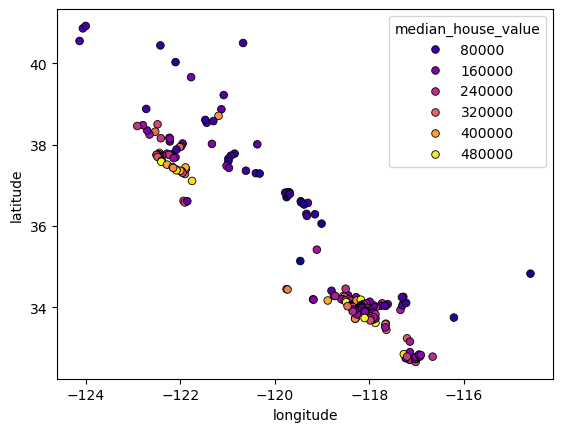

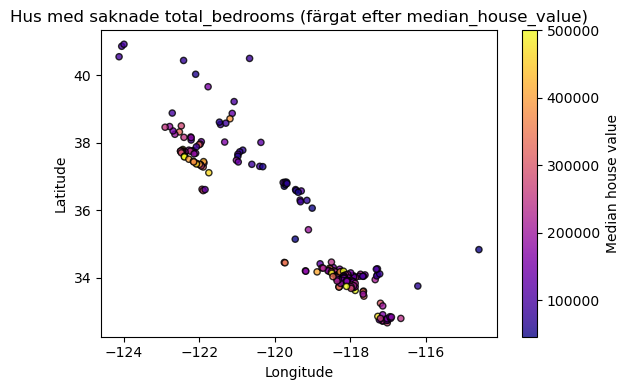

In [5]:
#1.2. Fortsättning...Saknas det några värden i housing-data, dvs null-väden

#Why have these rows null values for total_bedrooms? Can we draw any conlusions or
#is it just bad data with rows that we could delete?

#NOTE: Just trying out seaborn library here in comparison with matplotlib.pyplot down below.
#So, visualizing same data with two different libraries. That being said, with the pyplot version
#you have more control and searborn is more used for quickly visualizing data. You can
#use seaborn in combination with pyplot since seaborn is built around pyplot.

#Try to see if the null values are concentrated to a specific area
cmap = plt.get_cmap("plasma")
sns.scatterplot(data=houses[houses['total_bedrooms'].isnull()],
                x='longitude', y='latitude', hue='median_house_value', 
                legend='auto', palette=cmap, s=30, alpha=1, edgecolor='black',
                linewidth=0.6)
#We can see two clusters which have null values for total bedrooms. 


# Filtrera rader med saknade total_bedrooms
subset = houses[houses['total_bedrooms'].isnull()]

# Skapa scatterplot med färg baserad på median_house_value
fig, ax = plt.subplots(figsize=(6, 4))
sc = ax.scatter(
    subset['longitude'],
    subset['latitude'],
    c=subset['median_house_value'],  # färgvärden
    cmap='plasma',                  # färgpalett
    s=20,                            # punktstorlek
    alpha=0.8,                       # transparens
    edgecolors='black'                # renare look
)

# Lägg till färgbar och etiketter
cbar = fig.colorbar(sc)
cbar.set_label('Median house value')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Hus med saknade total_bedrooms (färgat efter median_house_value)')
fig.tight_layout()
#fig.show()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64
Number of rows:20640


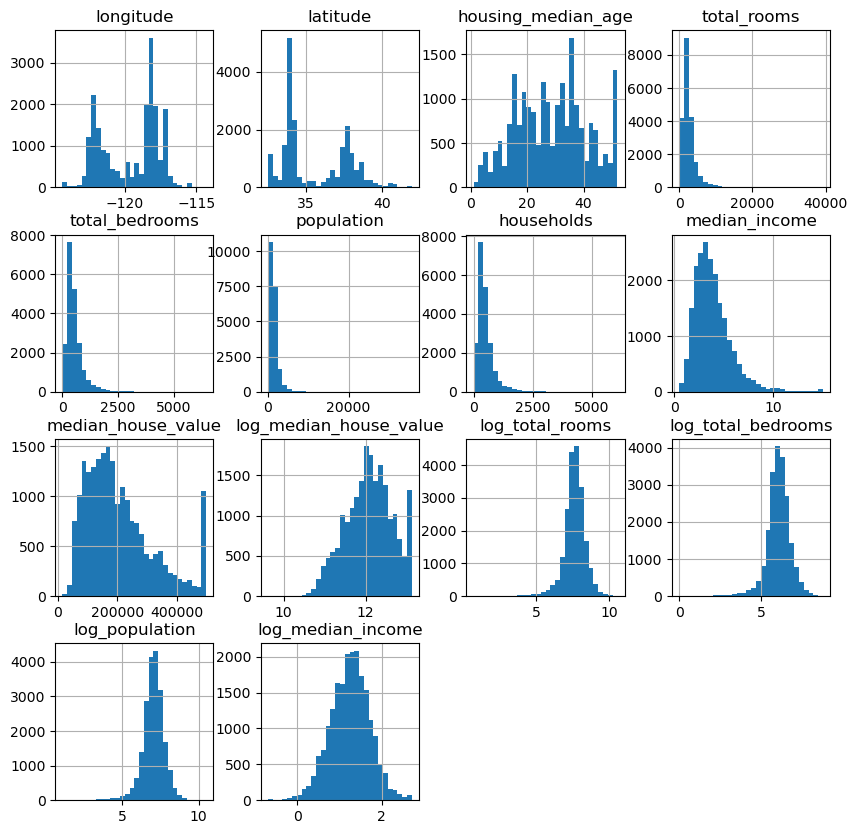

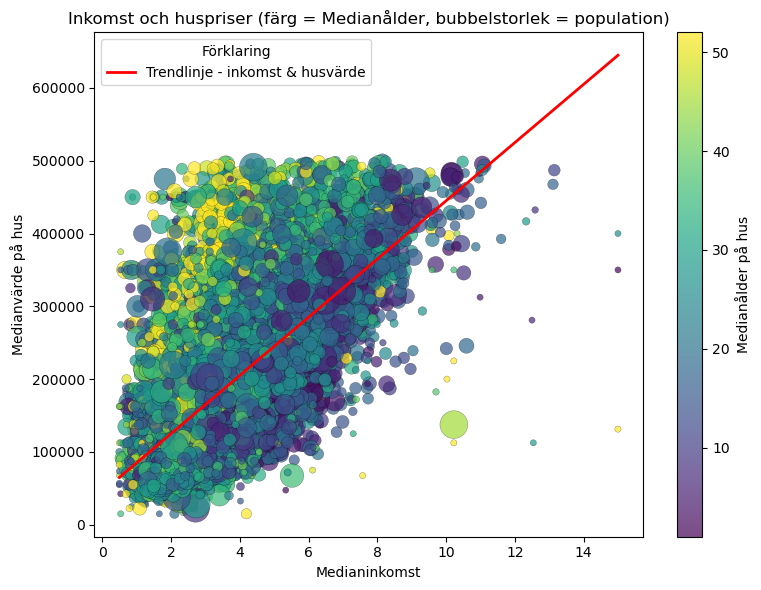

In [5]:
#2. Undersöka om vi kan se några samband i data?

#See the spread of where houses lies
#Note: In the data we can see that a major part of the houses 
#lies less than an hour from the ocean. After that comes Inland where a lot 
#houses also lies. Near ocean or bay are the smallest groups of houses. Around 1/3 
#of the houses lies near ocean or bay compared to Inland.
#The smallest group is Island which is almost not noticable among the data.
#
print(houses["ocean_proximity"].value_counts())

# Log-transformering
#Analysis: By log tranforming (taking out extreme values) some or all of the columns which are a bit scewed to the right
#we get a better data for models.
houses['log_median_house_value'] = np.log(houses['median_house_value'])
houses['log_total_rooms'] = np.log(houses['total_rooms'])
houses['log_total_bedrooms'] = np.log(houses['total_bedrooms'])
houses['log_population'] = np.log(houses['population'])
houses['log_median_income'] = np.log(houses['median_income'])

#Create a histogram of our data for analysis
print(f'Number of rows:{houses.shape[0]}')
houses.hist(figsize=(10,10), bins=30)

#Remove 207 rows with null values (total_bedrooms for comparison)
#subsetH = houses[houses["total_bedrooms"].notnull()]
#print(f'Number of rows:{subsetH.shape[0]}')
#subsetH.hist(figsize=(10,10), bins=30)
#print(f'Test: {houses['total_bedrooms'].value_counts(dropna=False)}')


#2:1. Kan vi se något samband mellan inkomst och huspriser?

#Filter out extreme values that are not representative
filtered_houses = houses[houses['median_house_value'] < 500000]

#Filter out extreme values 1-99 percentile
p_low, p_high = np.percentile(filtered_houses['population'], [1, 99])
clipped_population = np.clip(filtered_houses['population'], p_low, p_high)
#We need to scale our bubbles so it is readable in the diagram.
filtered_population = np.interp(clipped_population, (p_low, p_high), (20, 400))


fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(
    filtered_houses['median_income'],
    filtered_houses['median_house_value'],
    s=filtered_population,
    c=filtered_houses['housing_median_age'],
    cmap='viridis',
    alpha=0.7,
    edgecolors='black',
    linewidth=0.2
)

cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Medianålder på hus')

#Regression line showing correlation and trend between income and house value
sns.regplot(
    data=filtered_houses,
    x='median_income',
    y='median_house_value',
    scatter=False,
    ax=ax,
    ci=None,
    color='red',
    line_kws={'linewidth': 2})


line = ax.lines[-1]
ax.legend([line], ["Trendlinje - inkomst & husvärde"], title="Förklaring", frameon=True)

#ax.lines[0].set_label("Trendlinje (utan CI)")
ax.set_xlabel('Medianinkomst')
ax.set_ylabel('Medianvärde på hus')
ax.set_title('Inkomst och huspriser (färg = Medianålder, bubbelstorlek = population)')
fig.tight_layout()


#Conclusion: We can clearly see that income is a factor when it comes to house prices.
#Studying the visual plot we can also see a trend line (red) which indicates a trend
#where house prices correlates with the income. We can also see that younger houses
#are owned by those with higher income. However, those older houses are owned
#by those with lower income are also more expensive. The conclusion here could be
#that people has paid of their loans and those houses has gone up in value.
#and that is why they can afford to live in those houses. Another dimension is
#population, although there are some data that stands out it is hard to see any
#patterns to speak of. One thing that I did notice was some bigger populations
#along the trendline, the more you earn the higher the house value. 




<Axes: xlabel='housing_median_age', ylabel='median_house_value'>

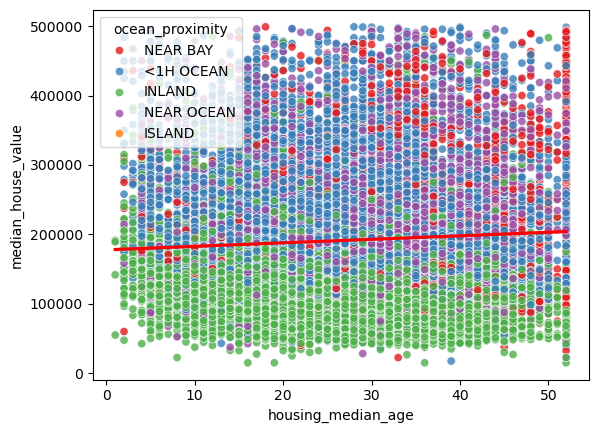

In [ ]:
#2:2: Hur påverkar åldern på husen priserna?
#Vi skapar en scatter plot som visar förhållandet mellan dessa båda men även ocean_proximity
#Detta eftersom närheten till vatten många gånger är avgörande för priset. Det är också
#intressant i senare analys för att jämföra latitude och longitude och se hur huspriserna ser
#ut då. Kategoriena bör stämma men det blir lättare att se visuellt på en karta.

"""
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(filtered_houses['housing_median_age'], filtered_houses['median_house_value'],
            alpha=0.5, s=20, c='blue')
ax.set_xlabel('Husets ålder (median)')
ax.set_ylabel('Huspris (median)')
ax.set_title('Samband mellan husets ålder och huspris')
plt.tight_layout()
"""

sns.scatterplot(data=filtered_houses, 
                x='housing_median_age', 
                y='median_house_value',
                alpha=0.8, 
                hue='ocean_proximity', palette='Set1')
#Add trend line
sns.regplot(data=filtered_houses, 
            x='housing_median_age', 
            y='median_house_value',
            scatter=False, color='red')

#Conclusion: We can clearly see the house prices are lower when house lies Inland (green) compared
#to house prices near the ocean or near bay(blue and red). We can see some indication of older houses
#near the bay area that are among the most expensive houses. If we also study the trend line 
#we can see that the prices are going up with age, not by much but they are increasing.
#If I were to speculate, the data indicate mostly inflation increse in value.





Text(0.5, 0, 'Kategorier')

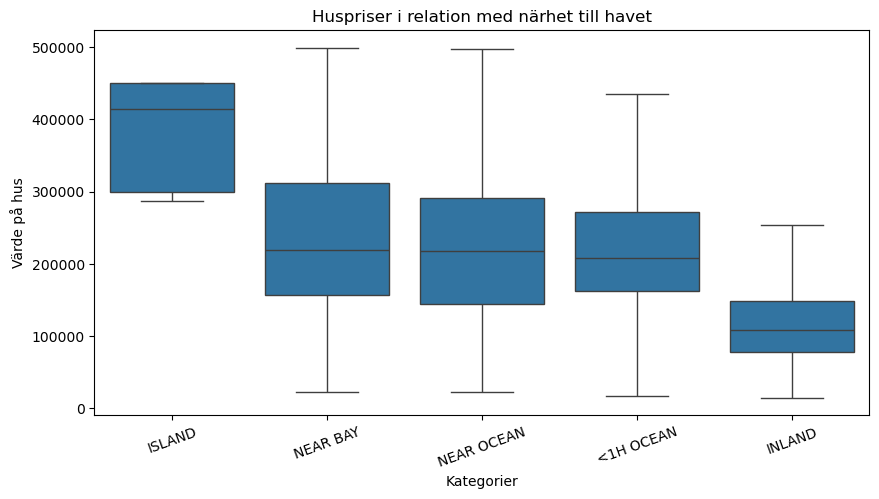

In [ ]:
#2:3. Hur påverkas huspriserna av närheten till havet?

#Group and sort data based ocean proximity categories and median house values. 
#It will give the effect of showing categories from expensive to cheaper houses
order = filtered_houses.groupby('ocean_proximity')['median_house_value'].median().sort_values(ascending=False).index

#Show data with boxplot and hide extreme values (showfliers=False) which only serves as noise for our EDA
plt.figure(figsize=(10, 5))
sns.boxplot(data=filtered_houses, 
            x='ocean_proximity', 
            y='median_house_value', 
            order=order, showfliers=False)
plt.title("Huspriser i relation med närhet till havet")
plt.xticks(rotation=20)
plt.ylabel("Värde på hus")
plt.xlabel("Kategorier")

#Conclusion: As we can see in the boxplot, house prices are higher the close you get to the water.
#A bit surprised by the Island category has the most expensive houses. However, we only have a small
#amount of data around Islands so it might not be correct data that can represent the prices
#for houses on Islands.



C:\Users\peter\AppData\Local\Temp\ipykernel_11812\3064164684.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_houses['rooms_per_household'] = filtered_houses['total_rooms'] / filtered_houses['households']
C:\Users\peter\AppData\Local\Temp\ipykernel_11812\3064164684.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_houses['bedrooms_per_household'] = filtered_houses['total_bedrooms'] / filtered_houses['households']
C:\Users\peter\AppData\Local\Temp\ipykernel_11812\3064164684.py:6: Setti

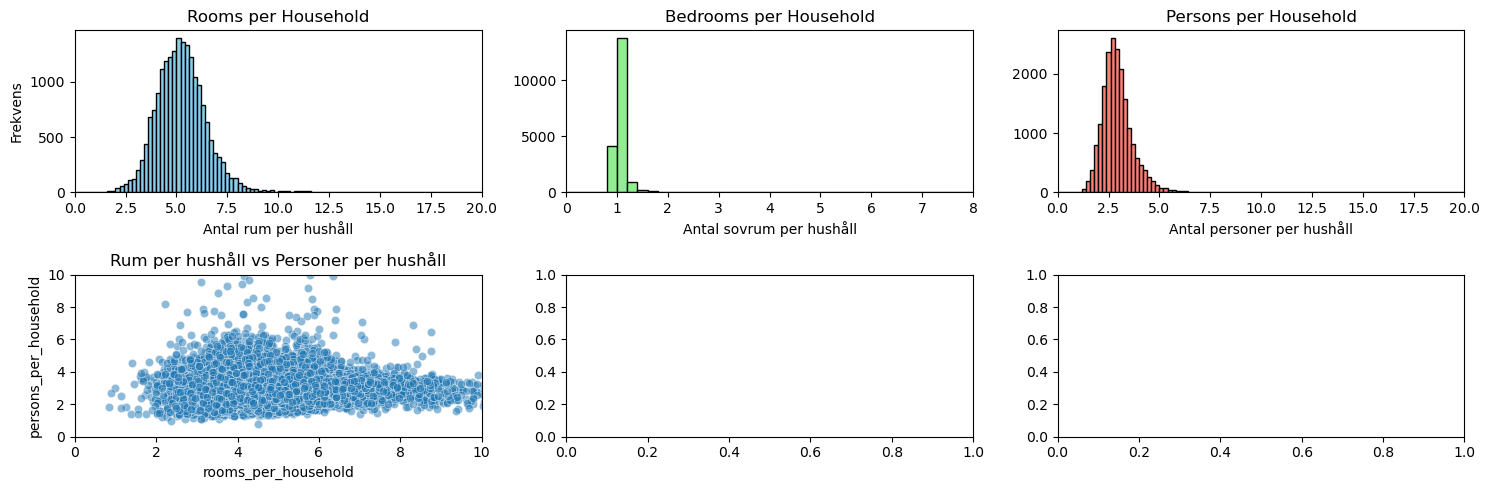

In [ ]:
#2:4. Hur stora är husen, dvs kan vi se generellt hur många rum ett hus har?

#First we need to calculate rooms, bedrooms and persons per households. 
filtered_houses['rooms_per_household'] = filtered_houses['total_rooms'] / filtered_houses['households']
filtered_houses['bedrooms_per_household'] = filtered_houses['total_bedrooms'] / filtered_houses['households']
filtered_houses['persons_per_household'] = filtered_houses['population'] / filtered_houses['households']

#After that, we want to visualize rooms, bedrooms and persons for each household
#so that we can get a feeling for the data we have.

fig, axes = plt.subplots(2, 3, figsize=(15, 5))
bin_width = 0.2

# Histogram för rooms_per_household
bins_rooms = np.arange(0, filtered_houses['rooms_per_household'].max() + bin_width, bin_width)
axes[0][0].hist(filtered_houses['rooms_per_household'], bins=bins_rooms, color='skyblue', edgecolor='black')
axes[0][0].set_title('Rooms per Household')
axes[0][0].set_xlabel('Antal rum per hushåll')
axes[0][0].set_ylabel('Frekvens')
axes[0][0].set_xlim(0,20)

# Histogram för bedrooms_per_household
bins_bedrooms = np.arange(0, filtered_houses['bedrooms_per_household'].max() + bin_width, bin_width)
axes[0][1].hist(filtered_houses['bedrooms_per_household'], bins=bins_bedrooms, color='lightgreen', edgecolor='black')
axes[0][1].set_title('Bedrooms per Household')
axes[0][1].set_xlabel('Antal sovrum per hushåll')
axes[0][1].set_xlim(0,8)

# Histogram för persons_per_household
bins_persons = np.arange(0, filtered_houses['persons_per_household'].max() + bin_width, bin_width)
axes[0][2].hist(filtered_houses['persons_per_household'], bins=bins_persons, color='salmon', edgecolor='black')
axes[0][2].set_title('Persons per Household')
axes[0][2].set_xlabel('Antal personer per hushåll')
axes[0][2].set_xlim(0,20)

sns.scatterplot(data=filtered_houses, 
                x='rooms_per_household', 
                y='persons_per_household', 
                alpha=0.5, ax=axes[1][0])
axes[1][0].set_title('Rum per hushåll vs Personer per hushåll')
axes[1][0].set_xlim(0,10)
axes[1][0].set_ylim(0,10)

# Justera layout
fig.tight_layout()


#Conclusion: Looking at rooms per house hold it varies from 2-10 rooms but most house holds 
# have about 5 rooms. When it comes to bedrooms we can see that most households has 1 bedroom
# Moving on the the number of persons per household we can see by studying the scatterplot
# that in general 1-6 people live in a household with 2-6 rooms. 
# We can also see that when the number of rooms increases (>6 rooms) the number of
# people in the house hold decreases. Somewhere around 2-4 people lives in those houses.

